In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv(r"D:\Machine learning\GKiMl\SP_data.csv")

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.shape

(395, 33)

In [6]:
# Xem kiểu dữ liệu và số lượng giá trị
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
columns_to_drop = ['address', 'famsize', 'Medu','Fedu','Mjob', 'Fjob','reason', 'guardian','traveltime', 'schoolsup', 'famsup', 'nursery','internet', 'Dalc', 'Walc']

df = df.drop(columns=columns_to_drop)

In [8]:
df.shape

(395, 18)

In [9]:
# Tổng số ô missing trong toàn bộ DataFrame
df.isna().sum().sum()

np.int64(0)

In [10]:
# Kiểm tra lại cho chắc
print(f"Tổng số ô missing: {df.isna().sum().sum()}")
print(f"Có missing nào không: {df.isna().any().any()}")

Tổng số ô missing: 0
Có missing nào không: False


In [11]:
# Kiểm tra số lượng hàng trùng lặp
df.duplicated().sum()

np.int64(0)

In [12]:
# Tạo cột mới 'G1_10'
df['G1_10'] = df['G1'] / 2

# 2. Chuyển đổi G2 từ thang 20 về thang 10
# Tạo cột mới 'G2_10'
df['G2_10'] = df['G2'] / 2

df['G3_10'] = df['G3'] / 2

# 3. Hiển thị kết quả kiểm tra
print(df[['G1', 'G1_10', 'G2', 'G2_10', 'G3', 'G3_10']].head())

   G1  G1_10  G2  G2_10  G3  G3_10
0   5    2.5   6    3.0   6    3.0
1   5    2.5   5    2.5   6    3.0
2   7    3.5   8    4.0  10    5.0
3  15    7.5  14    7.0  15    7.5
4   6    3.0  10    5.0  10    5.0


In [13]:
df.describe()

,age,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3,G1_10,G2_10,G3_10
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190,5.454430,5.356962,5.207595
std,1.276043,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443,1.659597,1.880752,2.290721
min,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.500000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000,4.000000,4.500000,4.000000
50%,17.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000,5.500000,5.500000,5.500000
75%,18.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000,6.500000,6.500000,7.000000
max,22.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,9.500000,9.500000,10.000000


In [14]:
df.describe(include="object").columns

Index(['school', 'sex', 'Pstatus', 'paid', 'activities', 'higher', 'romantic'], dtype='object')

In [15]:
df.describe(include=['int64', 'float64']).columns

Index(['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G1', 'G2', 'G3', 'G1_10', 'G2_10', 'G3_10'],
      dtype='object')

In [16]:
categorical_cols= ['sex', 'Pstatus', 'paid', 'activities', 'higher', 'romantic']
for col in categorical_cols:
    print(f"Value counts for {col}: \n {df[col].value_counts()}")

Value counts for sex: 
 sex
F    208
M    187
Name: count, dtype: int64
Value counts for Pstatus: 
 Pstatus
T    354
A     41
Name: count, dtype: int64
Value counts for paid: 
 paid
no     214
yes    181
Name: count, dtype: int64
Value counts for activities: 
 activities
yes    201
no     194
Name: count, dtype: int64
Value counts for higher: 
 higher
yes    375
no      20
Name: count, dtype: int64
Value counts for romantic: 
 romantic
no     263
yes    132
Name: count, dtype: int64


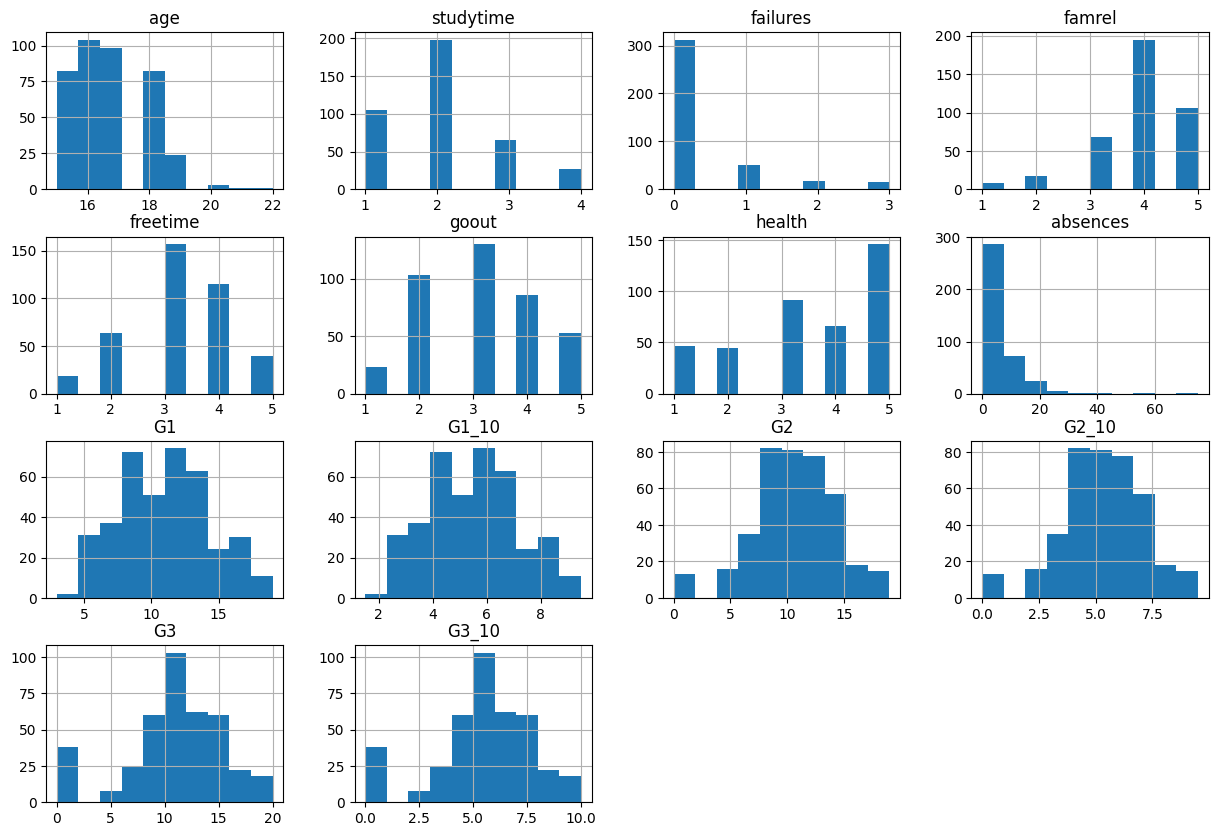

In [17]:
df[['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'absences','G1', 'G1_10', 'G2','G2_10' ,'G3', 'G3_10']].hist()
plt.gcf().set_size_inches(15,10)

In [18]:
df[['age', 'studytime', "failures", 'famrel', 'freetime', 'goout', 'health' ,"absences", 'G1_10', 'G2_10', 'G3_10']].skew()


age          0.466270
studytime    0.632142
failures     2.387026
famrel      -0.951882
freetime    -0.163351
goout        0.116502
health      -0.494604
absences     3.671579
G1_10        0.240613
G2_10       -0.431645
G3_10       -0.732672
dtype: float64

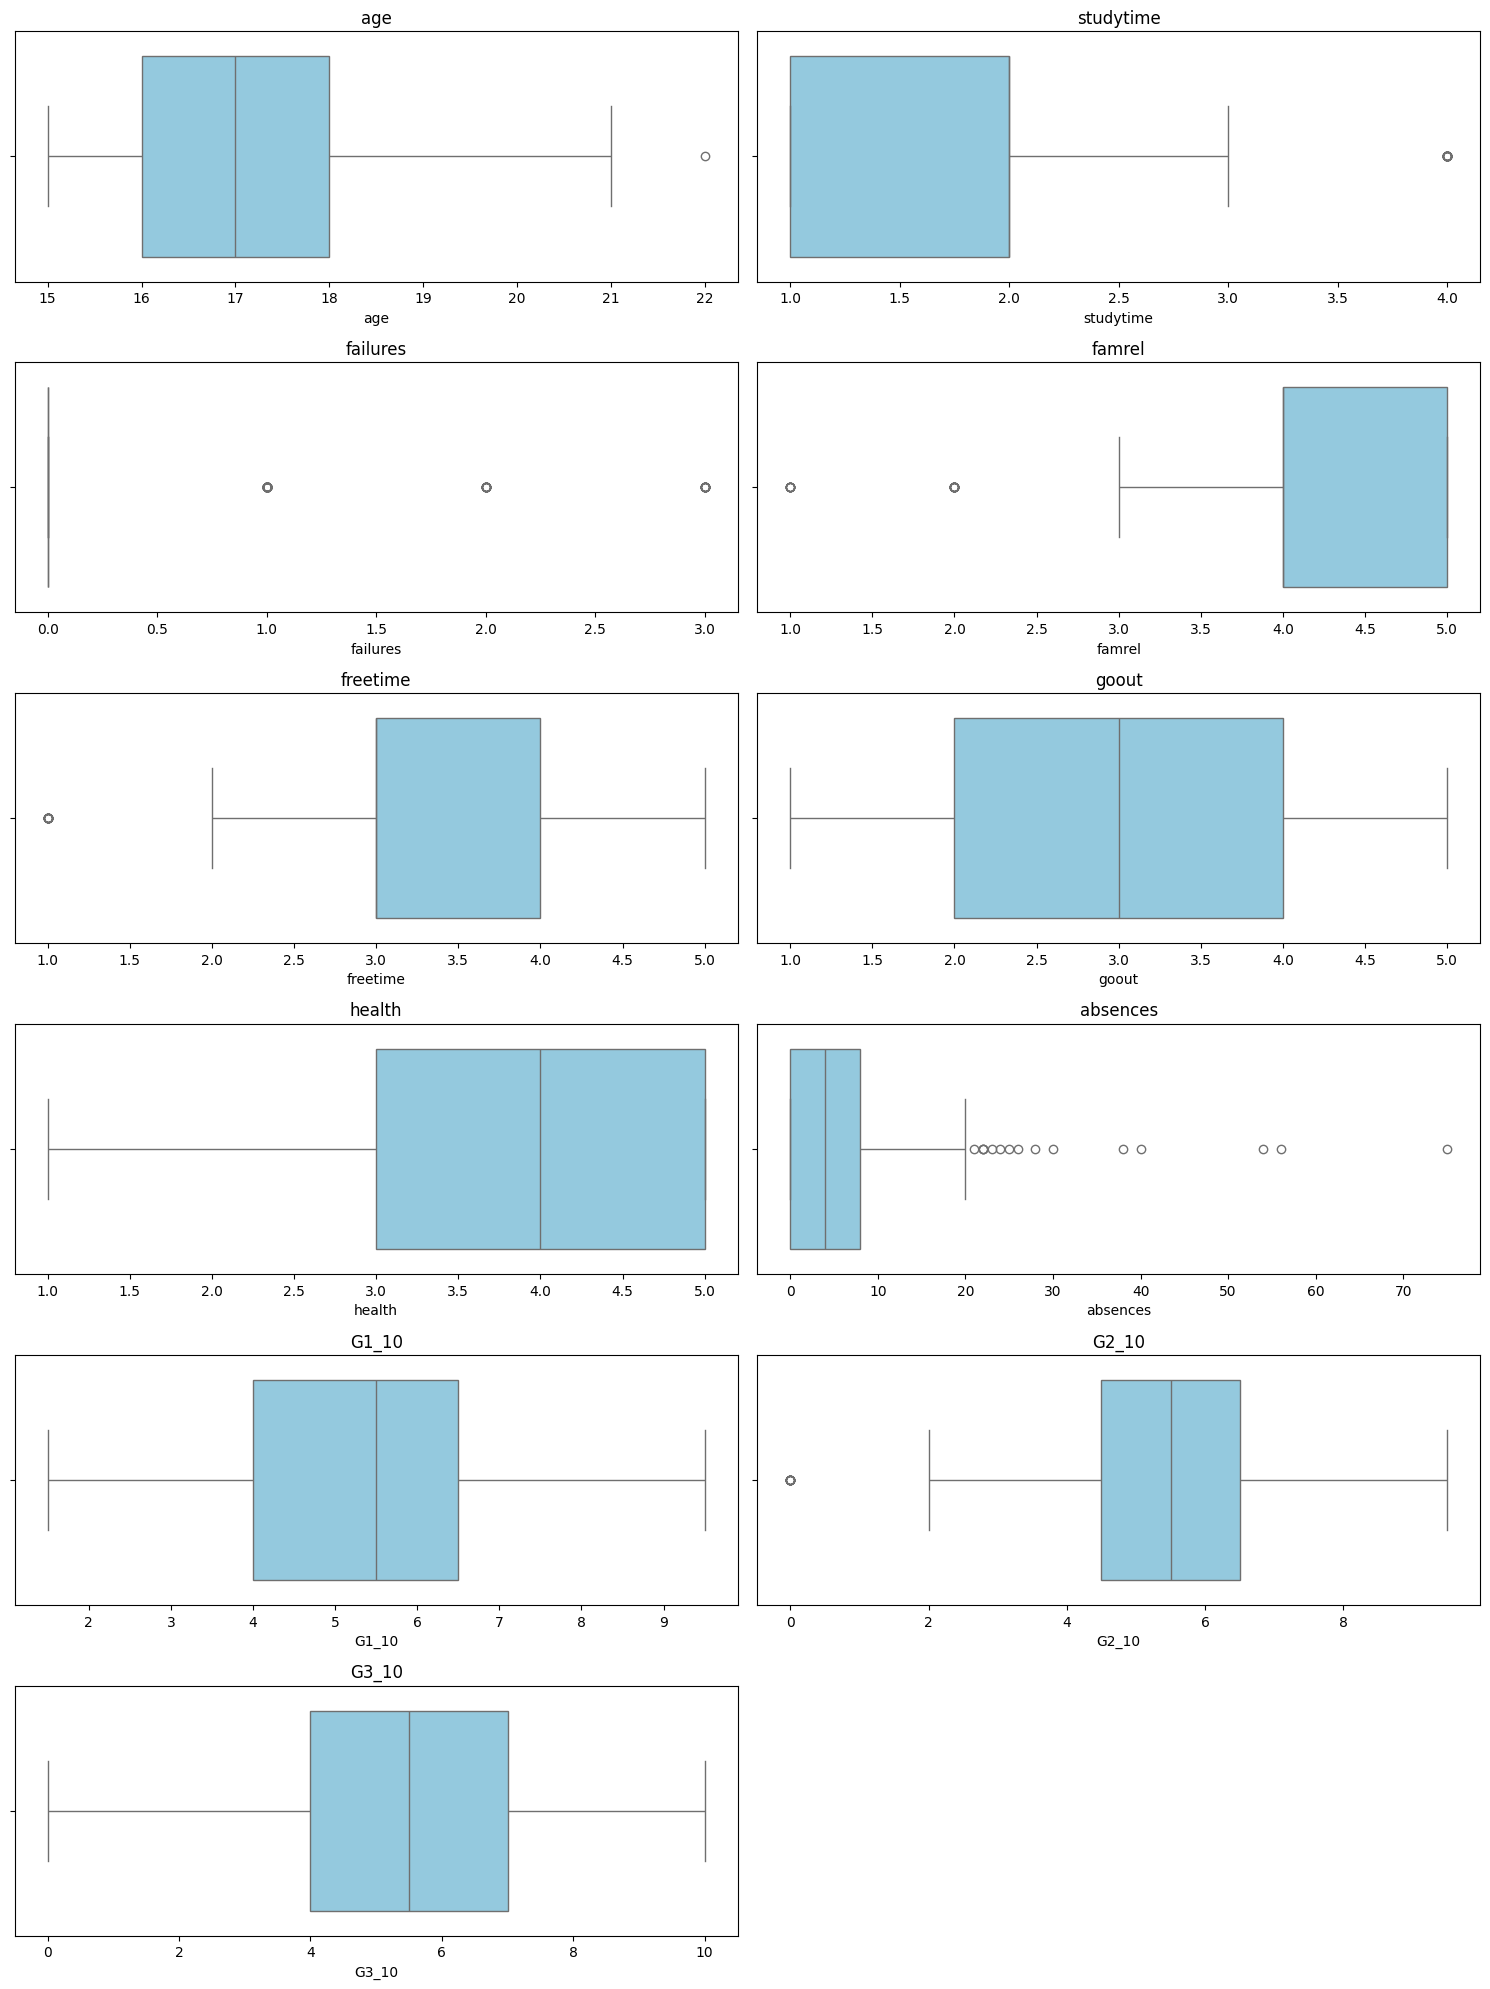

In [19]:
num_cols = ['age', 'studytime', "failures", 'famrel', 'freetime', 'goout', 'health' ,"absences", 'G1_10', 'G2_10', 'G3_10']

# Vẽ boxplot cho từng cột
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)  # Tự động chia lưới
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col, fontsize=12)
plt.tight_layout()
plt.show()

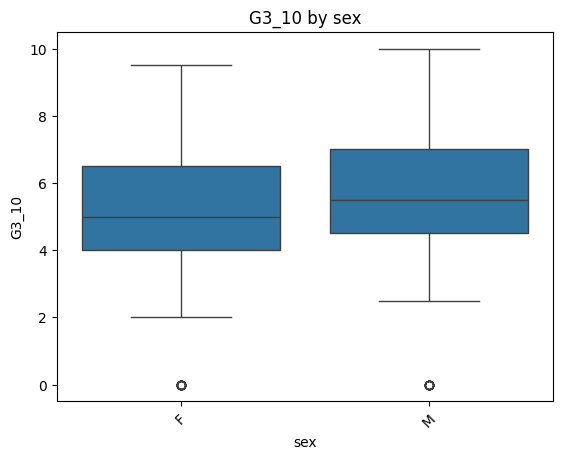

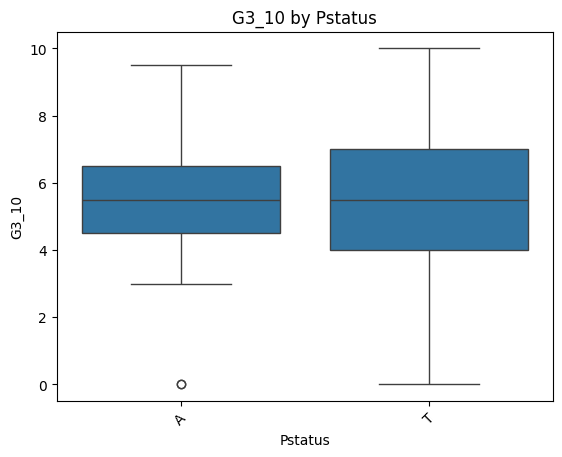

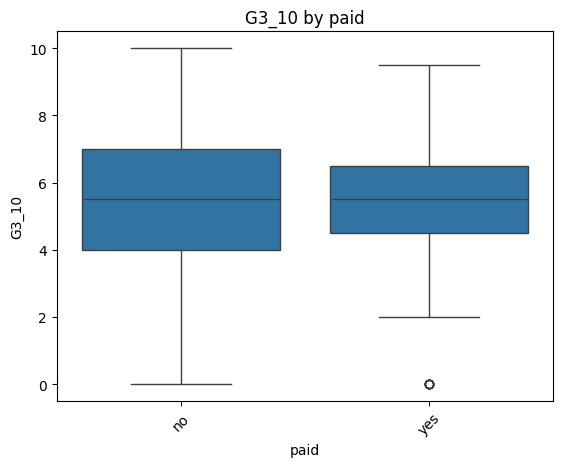

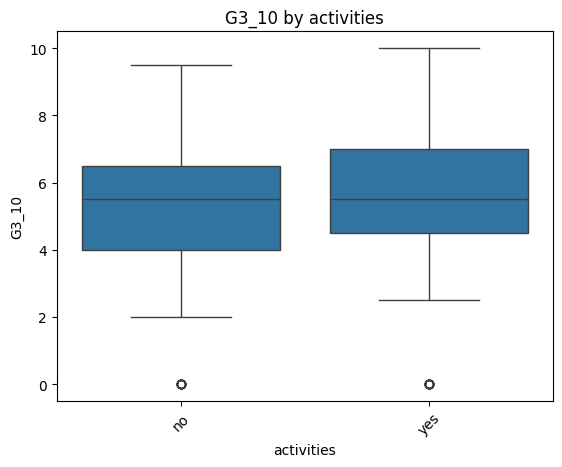

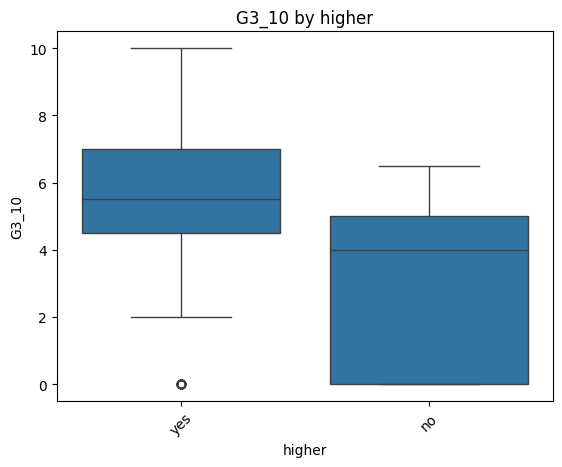

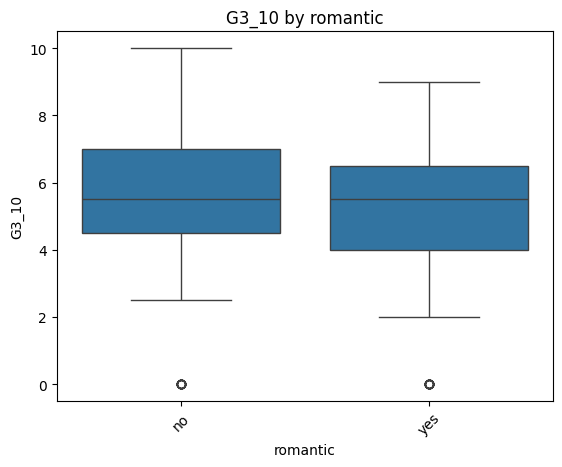

In [20]:
for col in categorical_cols:
    sns.boxplot(data = df, x= col, y= 'G3_10')
    plt.title(f"G3_10 by {col}")
    plt.xticks(rotation=45)
    plt.show()

In [21]:
capping_cols = ['age', 'absences', 'famrel', 'studytime','freetime', 'G2_10']


def cap_outliers_iqr_np(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    

    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))
    
    print(f"-> Đã Capping cột: {col}. Giới hạn IQR: [{lower:.2f}, {upper:.2f}]")
    return df

for col in capping_cols:
    df = cap_outliers_iqr_np(df, col)

-> Đã Capping cột: age. Giới hạn IQR: [13.00, 21.00]
-> Đã Capping cột: absences. Giới hạn IQR: [-12.00, 20.00]
-> Đã Capping cột: famrel. Giới hạn IQR: [2.50, 6.50]
-> Đã Capping cột: studytime. Giới hạn IQR: [-0.50, 3.50]
-> Đã Capping cột: freetime. Giới hạn IQR: [1.50, 5.50]
-> Đã Capping cột: G2_10. Giới hạn IQR: [1.50, 9.50]


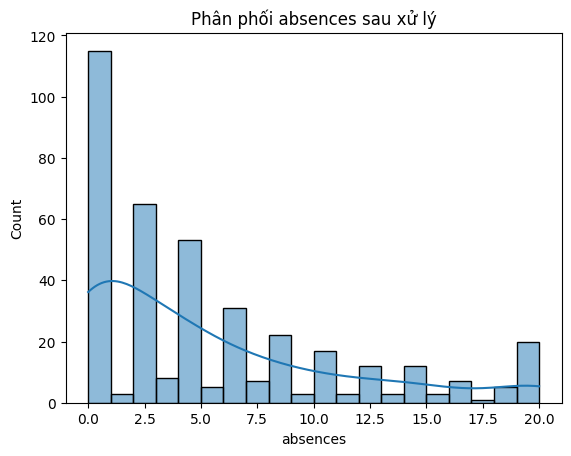

In [22]:
# Coi thu 2 bien 
sns.histplot(df['absences'], bins=20, kde=True)
plt.title("Phân phối absences sau xử lý")
plt.show()

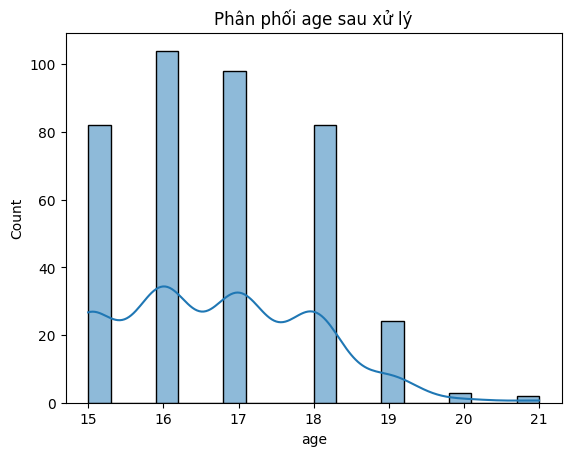

In [23]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Phân phối age sau xử lý")
plt.show()

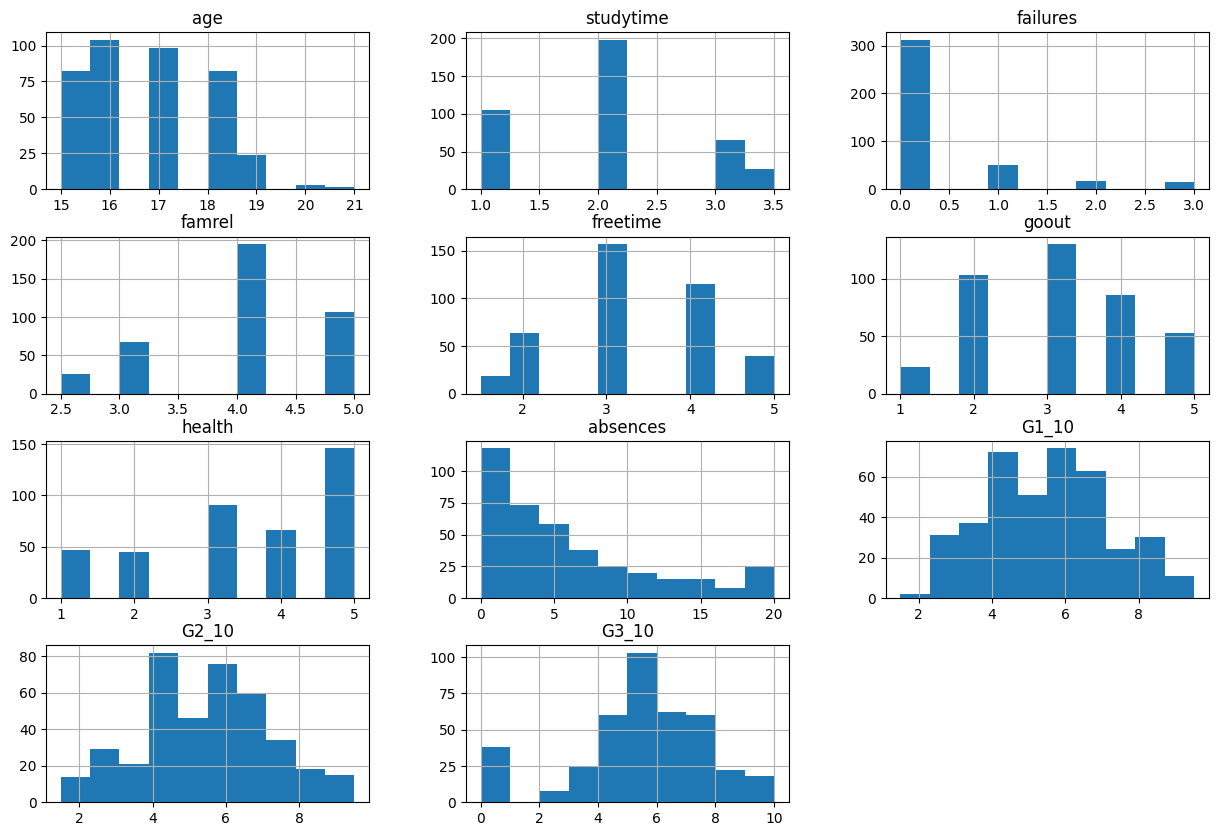

In [24]:
# Vẽ lại hist
df[['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G1_10', 'G2_10', 'G3_10']].hist()
plt.gcf().set_size_inches(15,10)

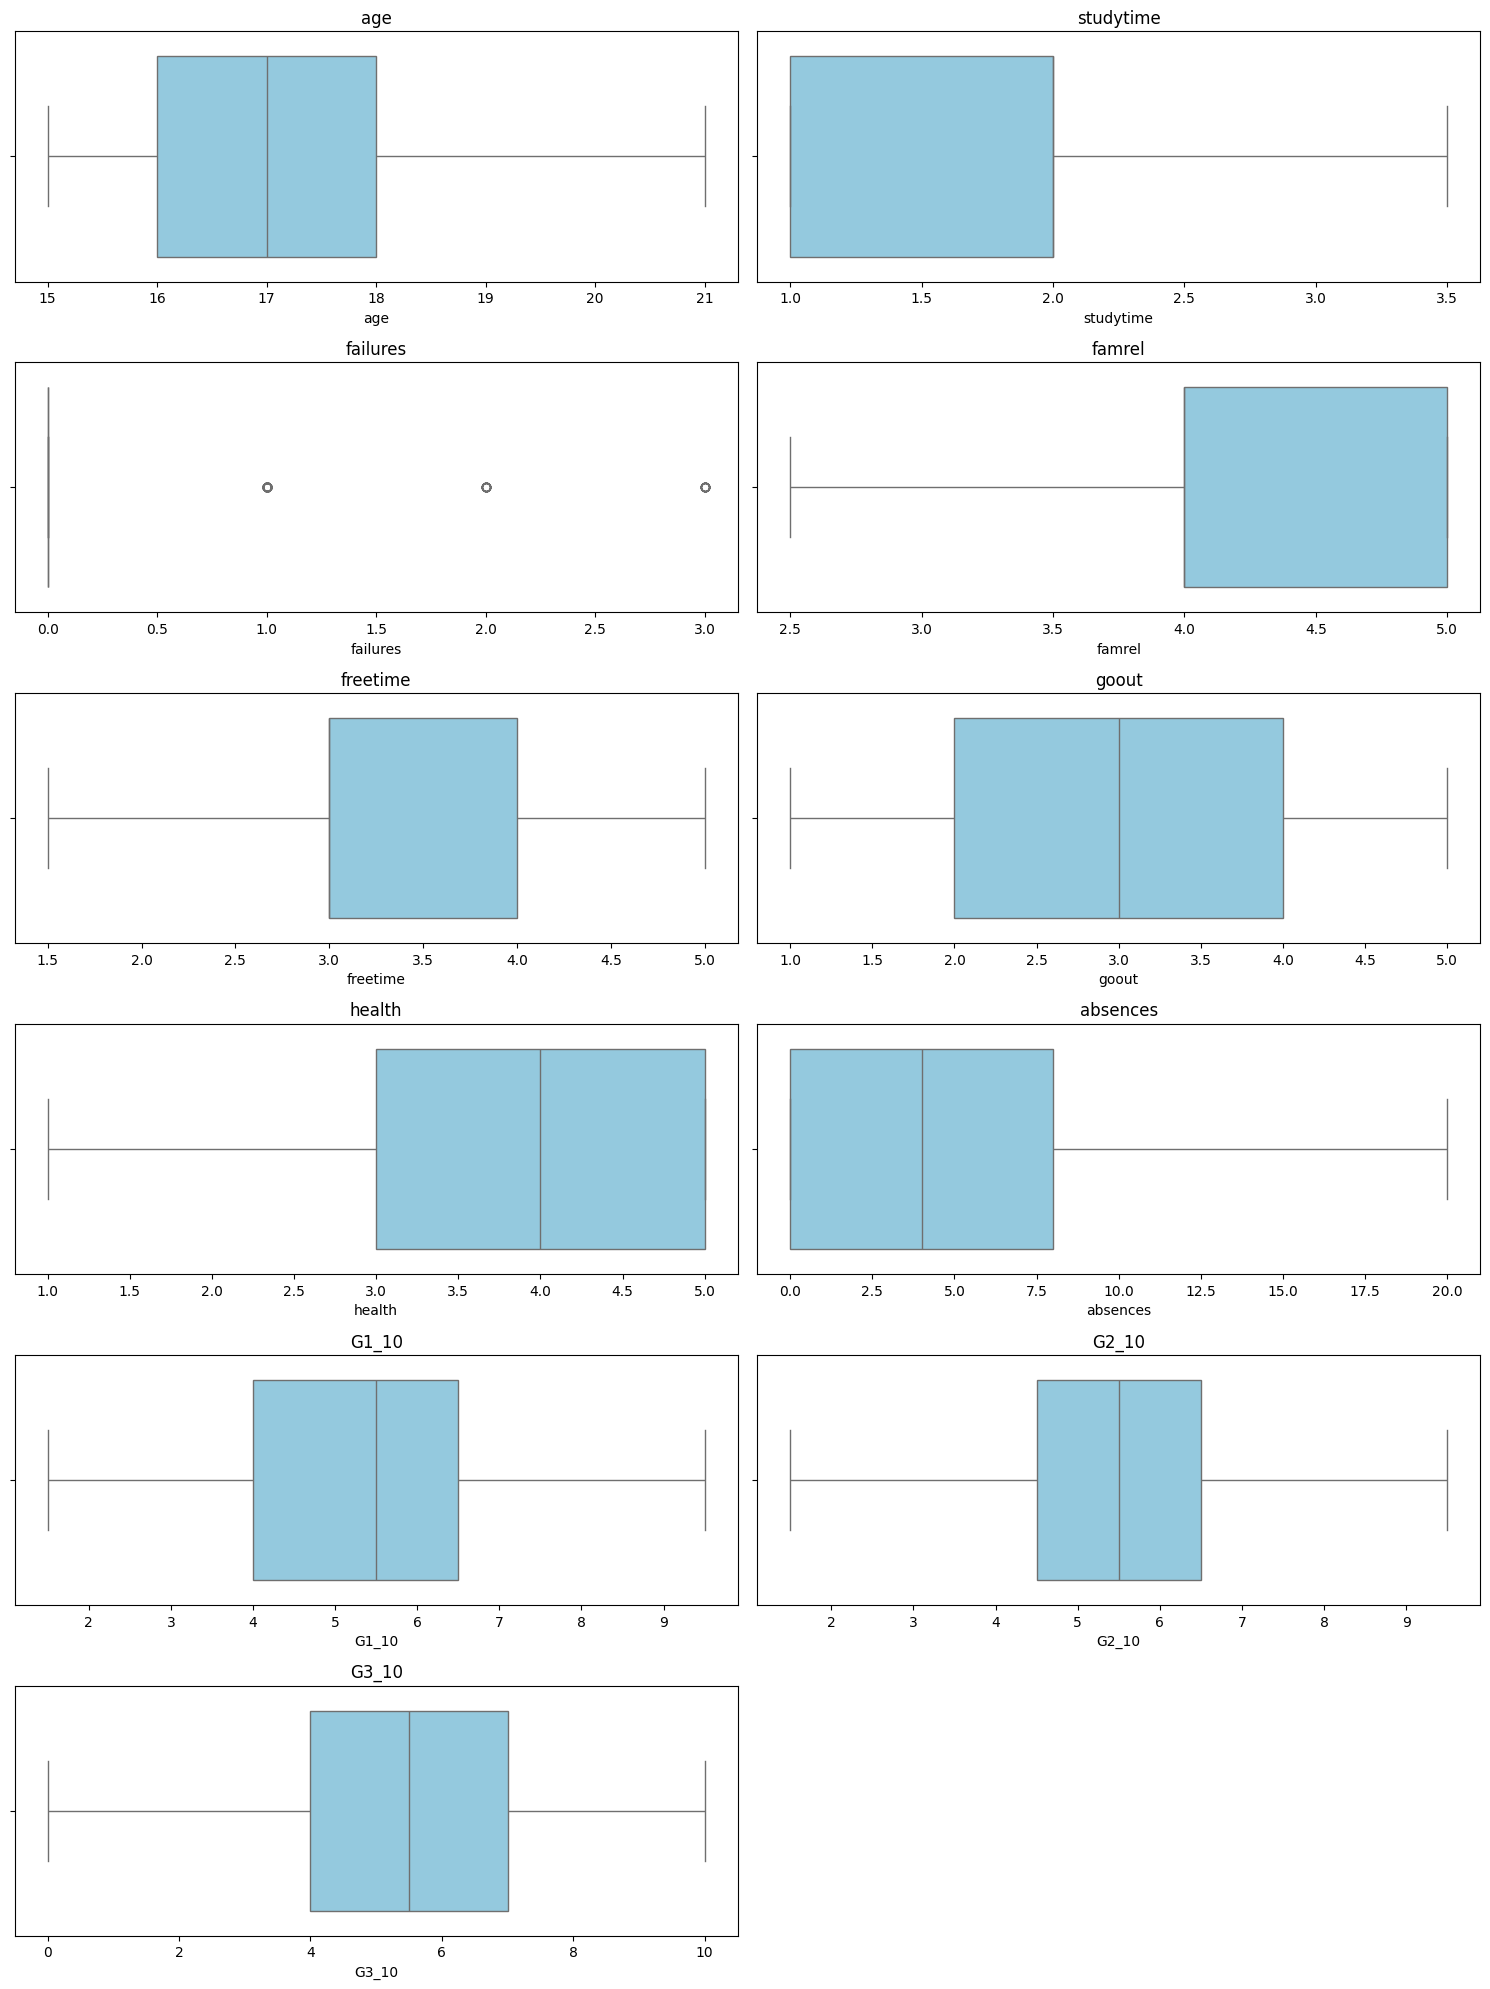

In [25]:
# Vẽ lại boxplot
num_cols = ['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1_10', 'G2_10', 'G3_10']
# Vẽ boxplot cho từng cột
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)  # Tự động chia lưới
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col, fontsize=12)
plt.tight_layout()
plt.show()

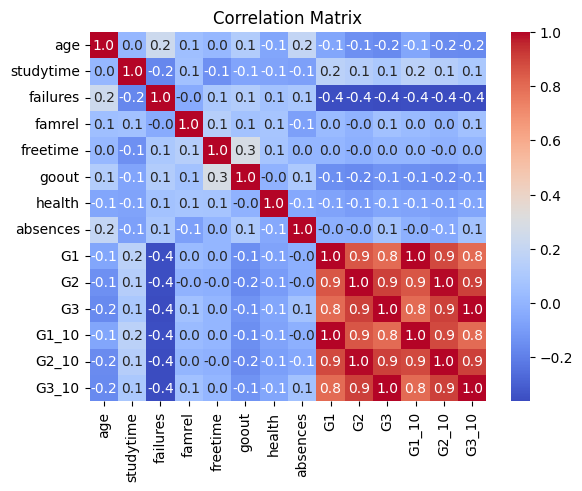

In [26]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

In [27]:
df['G_Avg'] = (df['G1_10'] + df['G2_10']) / 2

# 3. Hiển thị 5 hàng đầu tiên để kiểm tra kết quả
print(df.head())

  school sex   age Pstatus  studytime  failures paid activities higher  \
0     GP   F  18.0       A        2.0         0   no         no    yes   
1     GP   F  17.0       T        2.0         0   no         no    yes   
2     GP   F  15.0       T        2.0         3  yes         no    yes   
3     GP   F  15.0       T        3.0         0  yes        yes    yes   
4     GP   F  16.0       T        2.0         0  yes         no    yes   

  romantic  ...  goout  health  absences  G1  G2  G3  G1_10  G2_10  G3_10  \
0       no  ...      4       3       6.0   5   6   6    2.5    3.0    3.0   
1       no  ...      3       3       4.0   5   5   6    2.5    2.5    3.0   
2       no  ...      2       3      10.0   7   8  10    3.5    4.0    5.0   
3      yes  ...      2       5       2.0  15  14  15    7.5    7.0    7.5   
4       no  ...      2       5       4.0   6  10  10    3.0    5.0    5.0   

   G_Avg  
0   2.75  
1   2.50  
2   3.75  
3   7.25  
4   4.00  

[5 rows x 22 columns]


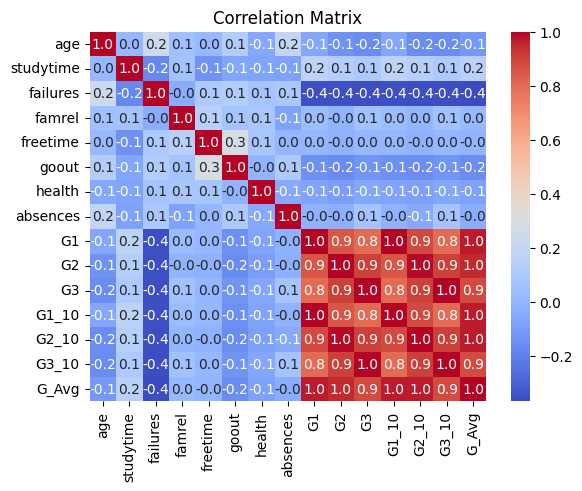

In [29]:
# Vẽ lại heatmap để coi tương quan của G_Avg
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

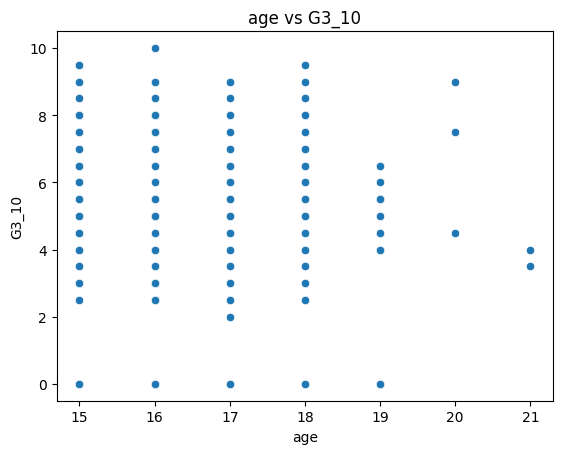

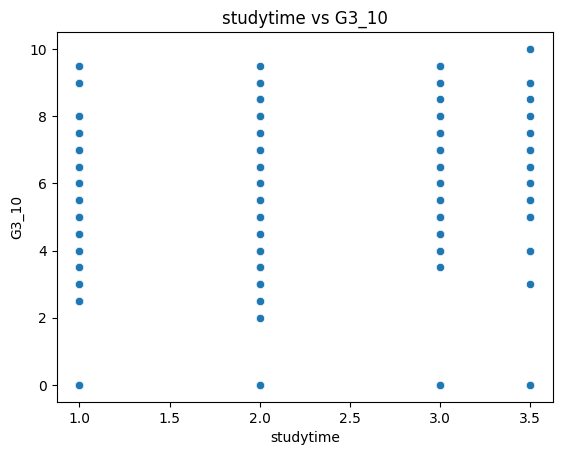

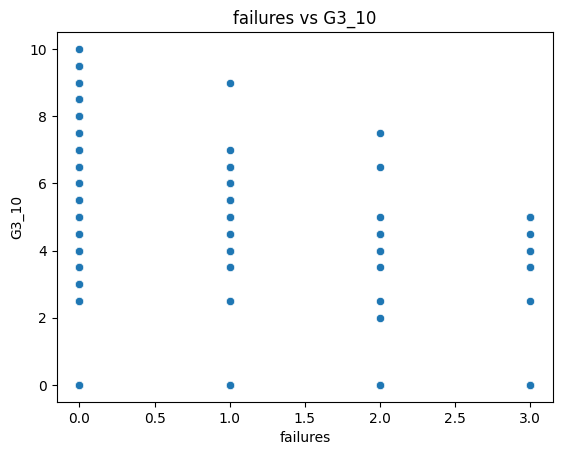

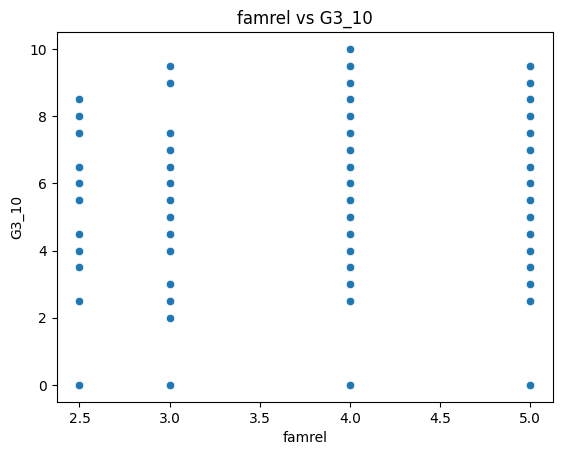

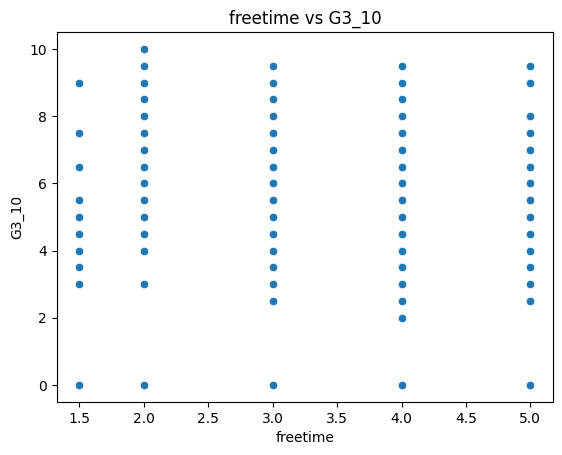

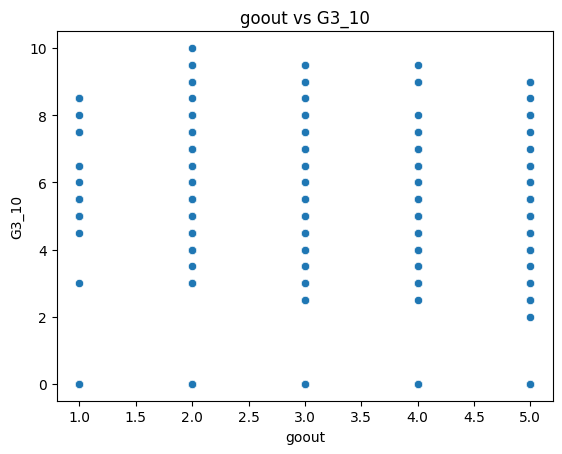

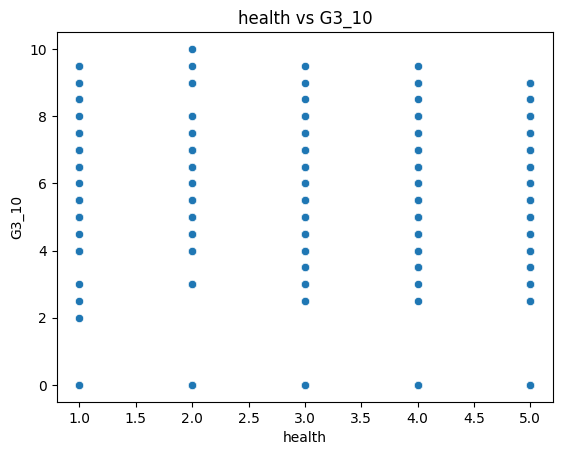

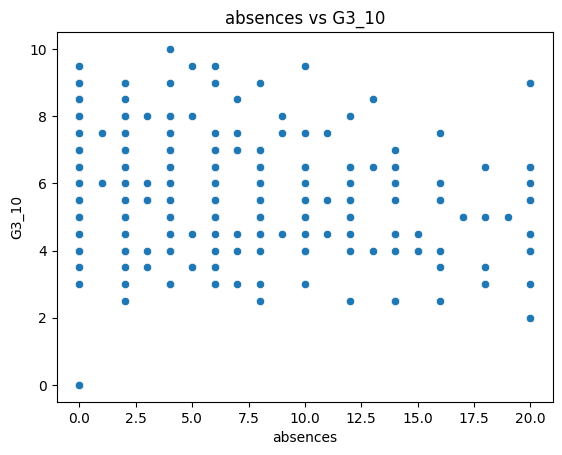

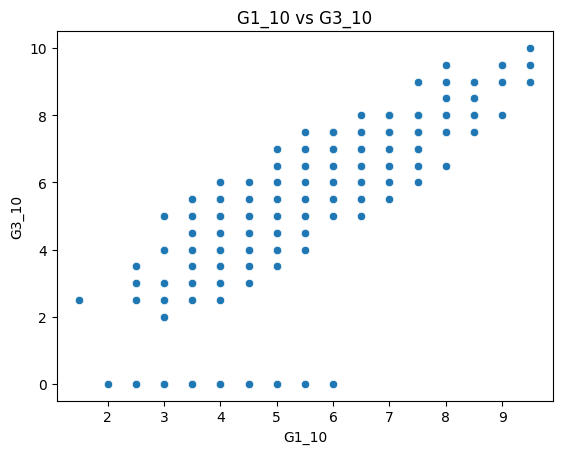

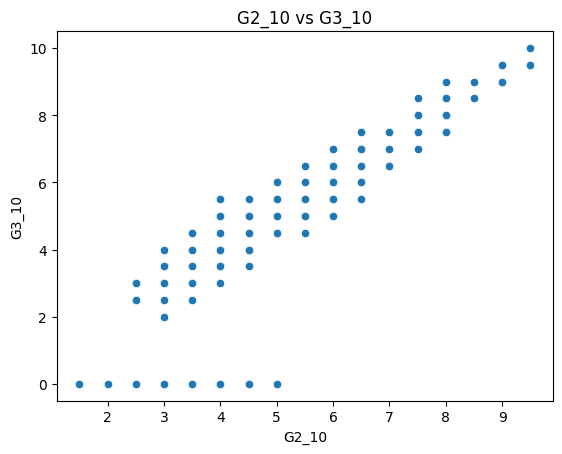

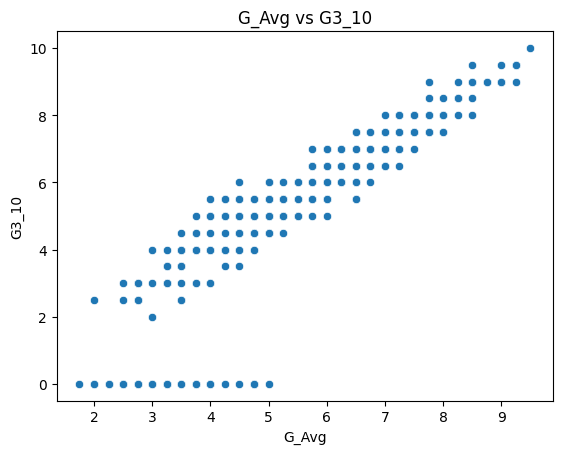

In [28]:
num_features=['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G1_10', 'G2_10', 'G_Avg']
for feature in num_features:
    sns.scatterplot(data=df, x = feature, y= 'G3_10') 
    plt.title(f"{feature} vs G3_10")
    plt.show()